In [24]:
import os
os.chdir("C:\\Users\\RAJA  IIT\\Desktop")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from PIL import Image
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import time
from sklearn.svm import SVC

In [26]:
df=pd.read_csv('Digit_train.csv')
df1=pd.read_csv('Digit_test.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y=df.label

In [28]:
train=df.copy()
test=df1.copy()

In [29]:
df=df.drop('label',axis=1)

In [30]:
train=train.drop('label',axis=1)

In [31]:
train1=(train-128)/128
train[train>0]=255

In [32]:
X1=train1.values
X2=train.values

In [33]:
X_test=df1.values
X_test1=(X_test-128)/128

In [34]:
X_test[X_test>0]=255

In [35]:
def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return (clf.score(testX,testY))

In [36]:
def evaluate_test(X,clf,y,Xtest):
    clf.fit(X,y)
    a=clf.predict(Xtest)
    return a

In [33]:
clf=RandomForestClassifier(n_estimators=500,criterion='gini')
a=evaluate_classifier(clf,X1,y,.8)

In [34]:
a

0.96642857142857141

In [14]:
clf=RandomForestClassifier(n_estimators=1000)

In [15]:
clf=RandomForestClassifier(n_estimators=1000)
pred=evaluate_test(X1,clf,y,X_test1)

In [37]:
def create_sub(prediction):
    df = pd.DataFrame( columns=['ImageId','Label'])
    df['ImageId'] = df1.index+1
    df['Label']=pred
    df.to_csv('submission.csv',index=False)    

In [17]:
create_sub(pred)

In [40]:
clf=RandomForestClassifier(n_estimators=500)
pred=evaluate_test(X2,clf,y,X_test)

In [41]:
create_sub(pred)

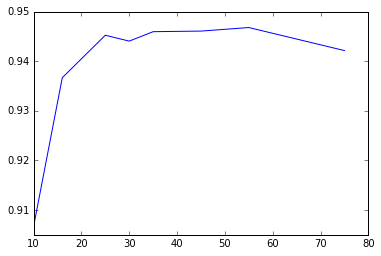

In [48]:
n_comp=[10,16,25,30,35,45,55,75]
A=[]
clf=RandomForestClassifier(n_estimators=50,criterion='gini')
for comp in n_comp:
    pca=PCA(n_components=comp,svd_solver='randomized',whiten=True)
    X3=pca.fit_transform(X1)
    a=evaluate_classifier(clf,X3,y,.8)
    A.append(a)
plt.plot(n_comp,A,'-')

In [21]:
clf=RandomForestClassifier(n_estimators=500)
X3=pca.fit_transform(X1)
X_test2=pca.fit_transform(X_test1)
pred=evaluate_test(X3,clf,y,X_test2)
create_sub(pred)

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf=AdaBoostClassifier(n_estimators=100,base_estimator=DecisionTreeClassifier(),learning_rate=.1)
pred=evaluate_test(X1,clf,y,X_test1)

In [23]:
create_sub(pred)